## Análise da Produção Ambulatorial do RN (2008/2018) focada em Sífilis


> O objetivo aqui é avaliar a produção ambulatorial informada via SIASUS, no período de Jan/2008 até Abr/2018, focando nos procedimentos e CIDs relacionadas à Sífilis




**Não tem informação interessante sobre sífilis nos dados do SIASUS**

In [1]:
med <- read.csv2("apac-laudos_08-18.csv", header=TRUE, encoding="UTF-8")

In [37]:
summary(med)

   AP_AUTORIZ                AP_APACANT         AP_CMP      
 Min.   :2.407e+12   0000000000000:598825   Min.   :200801  
 1st Qu.:2.410e+12   0            :  9241   1st Qu.:201003  
 Median :2.412e+12   2415207245803:    18   Median :201202  
 Mean   :2.412e+12   2415207168540:    13   Mean   :201214  
 3rd Qu.:2.414e+12   2416207274305:    13   3rd Qu.:201412  
 Max.   :2.419e+12   (Other)      : 54926   Max.   :201804  
                     NA's         :    49                   
   AP_PRIPAL            AP_VL_AP         AP_TPUPS    
 Min.   :201010569   Min.   :   0.0   Min.   : 2.00  
 1st Qu.:211070319   1st Qu.:  48.9   1st Qu.:36.00  
 Median :301080100   Median : 187.3   Median :39.00  
 Mean   :327951031   Mean   : 311.6   Mean   :42.94  
 3rd Qu.:405050372   3rd Qu.: 614.7   3rd Qu.:70.00  
 Max.   :701030321   Max.   :8359.0   Max.   :70.00  
                                                     
                                                                   AP_CNSPCN    

In [3]:
str(med)

'data.frame':	663085 obs. of  26 variables:
 $ AP_AUTORIZ: num  2.41e+12 2.41e+12 2.41e+12 2.41e+12 2.41e+12 ...
 $ AP_APACANT: Factor w/ 45211 levels "0","0           2",..: 6 6 6 6 6 6 6 6 6 6 ...
 $ AP_CMP    : int  200801 200801 200801 200801 200801 200801 200801 200801 200801 200801 ...
 $ AP_PRIPAL : int  211020010 301070032 211020010 301070032 211070092 211070092 211070092 211070092 211070092 701030062 ...
 $ AP_VL_AP  : num  614.7 97.4 614.7 79.9 23.5 ...
 $ AP_TPUPS  : int  5 39 5 39 36 36 36 36 36 36 ...
 $ AP_CNSPCN : Factor w/ 225892 levels "{\177{\u0080{\u0080{~\u0082{{{{{~",..: 52667 166284 147394 212216 144533 144386 138101 145480 144354 144097 ...
 $ AP_NUIDADE: int  76 59 43 66 25 23 32 39 26 64 ...
 $ AP_SEXO   : Factor w/ 2 levels "F","M": 1 2 1 1 1 2 1 2 2 2 ...
 $ AP_RACACOR: int  99 99 99 99 1 1 1 1 1 1 ...
 $ AP_CEPPCN : int  59000000 59870000 59000000 59865000 59324000 59327000 59324000 59324000 59327000 59300000 ...
 $ AP_UFDIF  : int  0 0 0 0 0 0 0 0 0 0 ...
 

In [ ]:
proc <- read.csv2("Procedimentos/procedimentos_sifilis.csv", header=TRUE, encoding="UTF-8")

In [ ]:
str(proc)

In [ ]:
sifilis <- subset(med, med$AP_PRIPAL %in% proc$CO_PROCEDIMENTO)

In [ ]:
str(sifilis)

In [ ]:
str(med)

### Criando um subset para investigar as 10 procedimentos mais frequentes por ano

In [2]:
library("dplyr")


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [5]:
result <- med %>%
    group_by(AP_CMP, AP_PRIPAL) %>%
    summarise( media_idade = mean(AP_NUIDADE),
             media_valor = mean(AP_VL_AP),
             total_valor = sum(AP_VL_AP),
             total_entradas = n())

In [6]:
head(result)

AP_CMP,AP_PRIPAL,media_idade,media_valor,total_valor,total_entradas
200801,211020010,61.60234,614.72000,105117.12,171
200801,211020028,3.00000,653.72000,653.72,1
200801,211070092,36.32230,34.81707,19985.00,574
200801,211070106,30.66667,150.70759,16276.42,108
200801,211070297,46.63699,63.55000,9278.30,146
200801,211070300,18.73810,153.74095,6457.12,42


In [3]:
library(ggplot2)

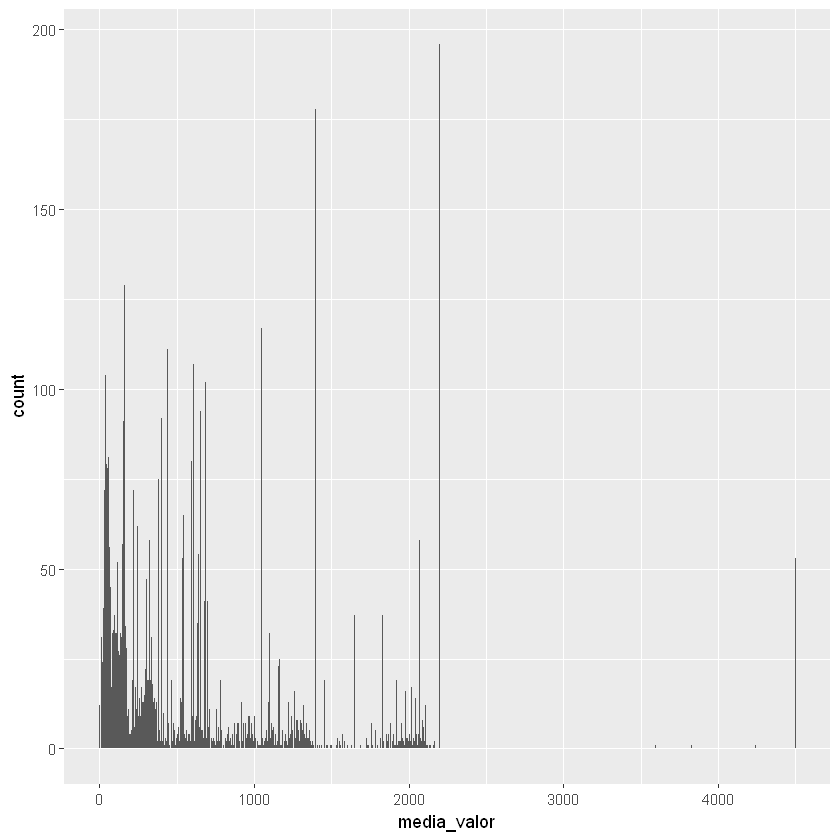

In [33]:
ggplot(result, aes(x = media_valor)) + 
  geom_histogram(bins=1000)

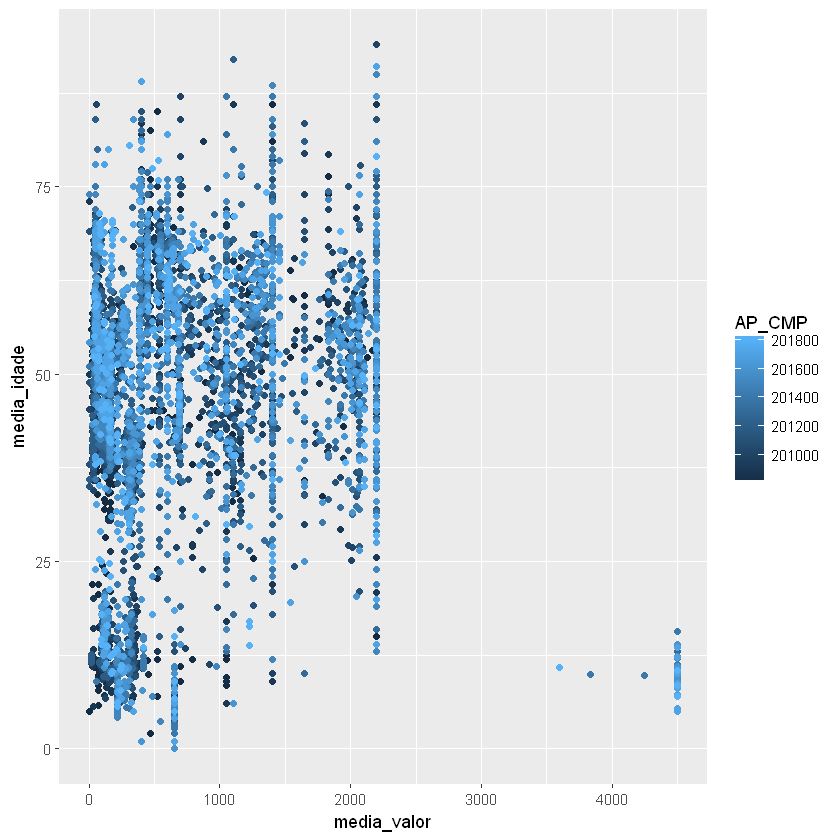

In [10]:
ggplot(result, aes(media_valor, media_idade, colour = AP_CMP)) + 
  geom_point()

In [11]:
valor_cmp <- result %>%
    group_by(AP_CMP) %>%
    summarise(valor_total_mes = sum(total_valor))

In [13]:
head(valor_cmp)

AP_CMP,valor_total_mes
200801,1070631
200802,1223983
200803,1142866
200804,1304630
200805,1541398
200806,1474486


In [17]:
valor_cmp$AP_CMP <- as.character(valor_cmp$AP_CMP)

In [26]:
valor_cmp$AP_CMP <- paste(valor_cmp$AP_CMP, "01", sep="")

In [27]:
str(valor_cmp)

Classes 'tbl_df', 'tbl' and 'data.frame':	124 obs. of  2 variables:
 $ AP_CMP         : chr  "20080101" "20080201" "20080301" "20080401" ...
 $ valor_total_mes: num  1070631 1223983 1142866 1304630 1541398 ...


In [29]:
valor_cmp$AP_CMP <- as.Date(valor_cmp$AP_CMP, "%Y%m%d")

In [30]:
str(valor_cmp)

Classes 'tbl_df', 'tbl' and 'data.frame':	124 obs. of  2 variables:
 $ AP_CMP         : Date, format: "2008-01-01" "2008-02-01" ...
 $ valor_total_mes: num  1070631 1223983 1142866 1304630 1541398 ...


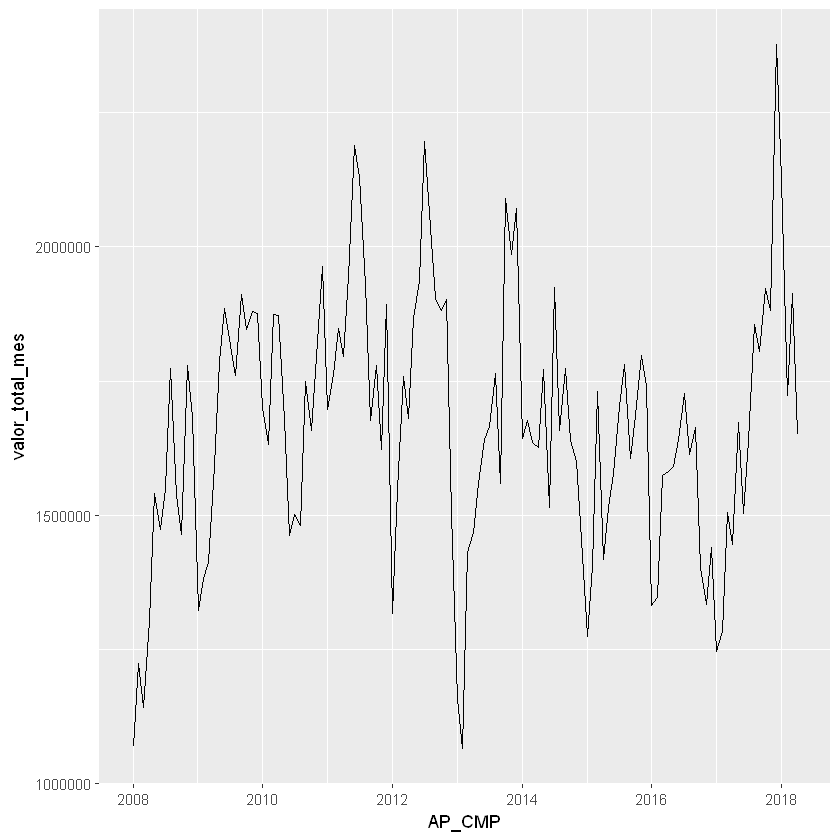

In [32]:
ggplot(valor_cmp, aes(AP_CMP, valor_total_mes)) + 
  geom_line()

In [34]:
str(med)

'data.frame':	663085 obs. of  26 variables:
 $ AP_AUTORIZ: num  2.41e+12 2.41e+12 2.41e+12 2.41e+12 2.41e+12 ...
 $ AP_APACANT: Factor w/ 45211 levels "0","0           2",..: 6 6 6 6 6 6 6 6 6 6 ...
 $ AP_CMP    : int  200801 200801 200801 200801 200801 200801 200801 200801 200801 200801 ...
 $ AP_PRIPAL : int  211020010 301070032 211020010 301070032 211070092 211070092 211070092 211070092 211070092 701030062 ...
 $ AP_VL_AP  : num  614.7 97.4 614.7 79.9 23.5 ...
 $ AP_TPUPS  : int  5 39 5 39 36 36 36 36 36 36 ...
 $ AP_CNSPCN : Factor w/ 225892 levels "{\177{\u0080{\u0080{~\u0082{{{{{~",..: 52667 166284 147394 212216 144533 144386 138101 145480 144354 144097 ...
 $ AP_NUIDADE: int  76 59 43 66 25 23 32 39 26 64 ...
 $ AP_SEXO   : Factor w/ 2 levels "F","M": 1 2 1 1 1 2 1 2 2 2 ...
 $ AP_RACACOR: int  99 99 99 99 1 1 1 1 1 1 ...
 $ AP_CEPPCN : int  59000000 59870000 59000000 59865000 59324000 59327000 59324000 59324000 59327000 59300000 ...
 $ AP_UFDIF  : int  0 0 0 0 0 0 0 0 0 0 ...
 

In [4]:
result_municipio <- med %>%
    group_by(AP_CMP, AP_CEPPCN, AP_PRIPAL) %>%
    summarise( media_idade = mean(AP_NUIDADE),
             media_valor = mean(AP_VL_AP),
             total_valor = sum(AP_VL_AP),
             total_entradas = n())

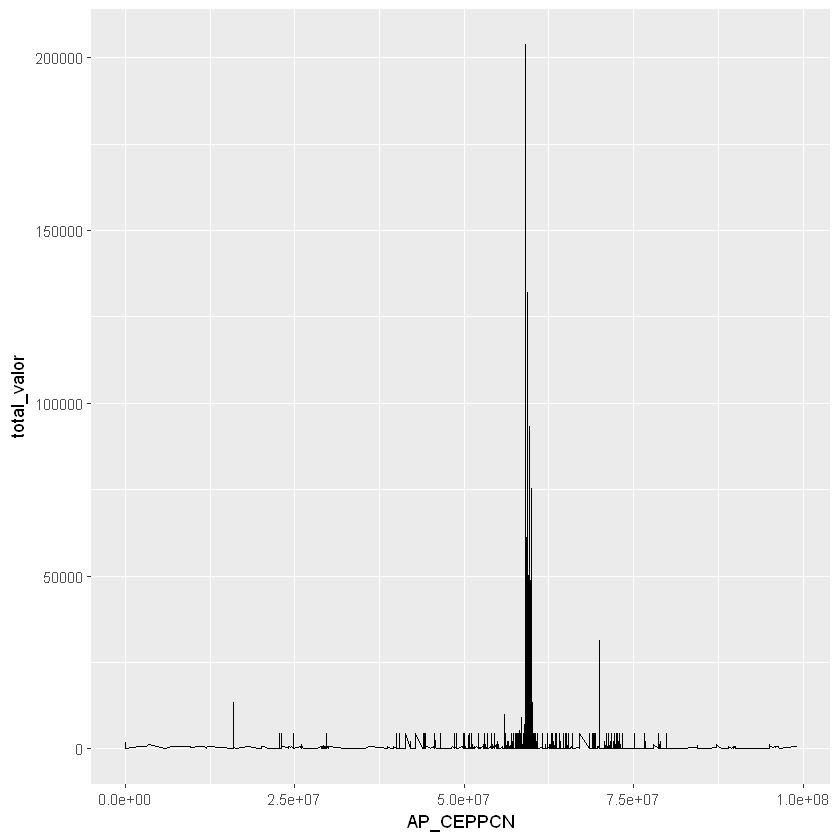

In [38]:
ggplot(result_municipio, aes(AP_CEPPCN, total_valor)) + 
  geom_line()

In [43]:
write.csv(result_municipio, "laudos-cep-2.csv", row.names=FALSE)

In [42]:
str(result_municipio)

Classes 'grouped_df', 'tbl_df', 'tbl' and 'data.frame':	250117 obs. of  7 variables:
 $ AP_CMP        : int  200801 200801 200801 200801 200801 200801 200801 200801 200801 200801 ...
 $ AP_CEPPCN     : int  0 25950800 25960000 50000000 50070150 50074050 50600000 54960000 56695000 57000000 ...
 $ AP_PRIPAL     : int  301080119 301080100 405050372 301080100 301080062 301080100 301080135 301080089 301080127 211070319 ...
 $ media_idade   : num  9 19 70 29 32 29 42 8 36 5 ...
 $ media_valor   : num  195.6 44.5 643 44.5 398.2 ...
 $ total_valor   : num  195.6 44.5 643 44.5 398.2 ...
 $ total_entradas: int  1 1 1 1 1 1 1 1 1 1 ...
 - attr(*, "vars")= chr  "AP_CMP" "AP_CEPPCN"
 - attr(*, "drop")= logi TRUE


In [6]:
install.packages('ggmap',repos = "https://CRAN.R-project.org/")

also installing the dependencies 'sp', 'proto', 'RgoogleMaps', 'png', 'rjson', 'mapproj', 'jpeg', 'geosphere'



package 'sp' successfully unpacked and MD5 sums checked
package 'proto' successfully unpacked and MD5 sums checked
package 'RgoogleMaps' successfully unpacked and MD5 sums checked
package 'png' successfully unpacked and MD5 sums checked
package 'rjson' successfully unpacked and MD5 sums checked
package 'mapproj' successfully unpacked and MD5 sums checked
package 'jpeg' successfully unpacked and MD5 sums checked
package 'geosphere' successfully unpacked and MD5 sums checked
package 'ggmap' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\r_ds\AppData\Local\Temp\RtmpQzfbXu\downloaded_packages


In [7]:
library(ggmap)

Warning message:
"package 'ggmap' was built under R version 3.4.4"

In [15]:
end <- geocode("59108-120", output="more")
end


Information from URL : http://maps.googleapis.com/maps/api/geocode/json?address=59108-120&sensor=false


lon,lat,type,loctype,address,north,south,east,west,postal_code,political,administrative_area_level_2,administrative_area_level_1,country
-35.25922,-5.763996,postal_code,approximate,"potengi, natal - rn, 59108-120, brazil",-5.761354,-5.766543,-35.25468,-35.26566,59108-120,Potengi,Natal,Rio Grande do Norte,Brazil


In [16]:
end$lon

[1] -35.25922

In [17]:
end$lat

[1] -5.763996

In [ ]:
getGeo <- function(data){
    res <- geocode(data, output="more")
}

In [26]:
result_municipio$cidade <- geocode(as.character(result_municipio$AP_CEPPCN), output="more")$administrative_area_level_2

ERROR: Error: google restricts requests to 2500 requests a day for non-business use.


In [20]:
summary(result_municipio$AP_CEPPCN)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
       0 59072888 59139435 59251994 59507000 99150000 

In [36]:
result_cid <- med %>%
    group_by(AP_CMP, AP_CIDPRI, AP_PRIPAL) %>%
    summarise( media_idade = mean(AP_NUIDADE),
             media_valor = mean(AP_VL_AP),
             total_valor = sum(AP_VL_AP),
             total_entradas = n())

In [40]:
?write.csv2